<a href="https://colab.research.google.com/github/FaizAlam/ML/blob/main/EDA_US_accident_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

TODO- talk about EDA

TODO- talk about the dataset (source, what it contains, how it will be helpful)


*   Kaggle
*   It contains 4M+ information about accidents
*   can be useful in prevention of accidents  

Edits:
* This does contain data of New York as well




# Downloading the dataset

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faizalam53
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:02<00:00, 106MB/s] 


In [ ]:
datafile_name = '/content/us-accidents/US_Accidents_Dec20_Updated.csv'

# Data Preparing and Cleaning

- Look the using Pandas
- Look at some information about data and the columns
- Look at the missing or incorrect values



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(datafile_name)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [ ]:
len(df.columns)

47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column
  

In [ ]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [ ]:
missing_percentage[missing_percentage!=0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

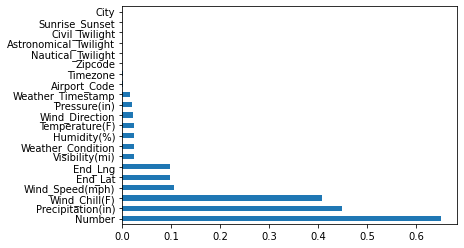

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

We can skip those columns which have NA value more than 50% or so because they won't be helpful

In [ ]:
df = df.drop()

# Exploratory analysis and visualization

columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Long
4. Temperature
5. Weather conditions

can analyze others also

### City Analysis

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
cities = df.City.unique()
len(cities)

11790

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
Longbranch           1
Trevor               1
Mayfield             1
Lansford             1
Sinclairville        1
Name: City, Length: 11789, dtype: int64

In [ ]:
cities_by_accident[0:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [ ]:
'New York' in cities

True

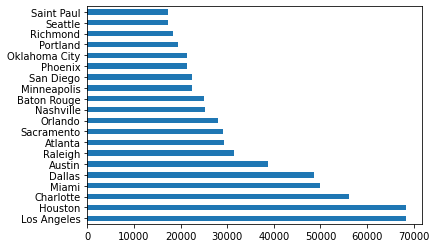

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


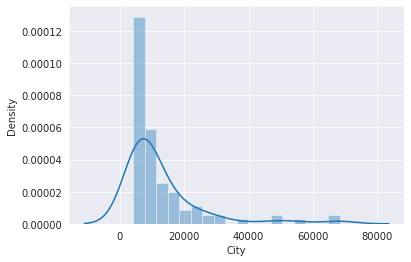

In [ ]:
sns.distplot(cities_by_accident[:100])

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
less_accident_cities = cities_by_accident[cities_by_accident<1000]

In [ ]:
len(high_accident_cities)

513

only 513 cities out of all have accidents more than 1000

In [ ]:
len(high_accident_cities)/len(cities)

0.04351145038167939

only 4.3% cities have more than 1000 yearly accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


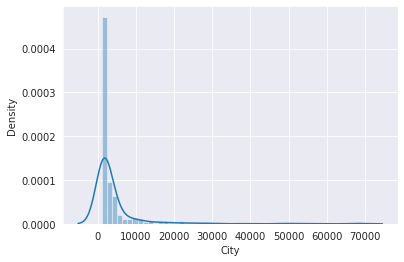

In [ ]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


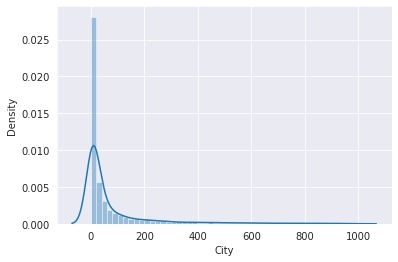

In [ ]:
sns.distplot(less_accident_cities)

both high and less graph is similarly to that of exponential graph. Both follows some pattern. We can use log scale to analyze better

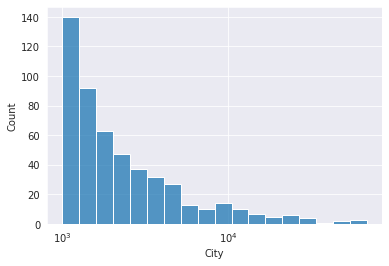

In [ ]:
sns.histplot(high_accident_cities,log_scale=True)

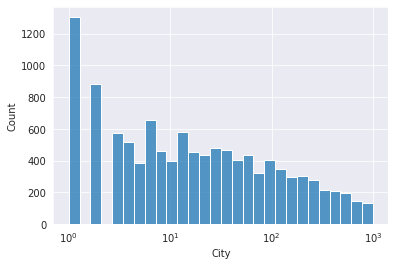

In [ ]:
sns.histplot(less_accident_cities,log_scale=True)

A lot of cities has 0 accidents. Which is kinda sus. 

In [ ]:
less_accident_cities[less_accident_cities<=10]


Huddleston         10
Emmetsburg         10
Madeline Plains    10
Glenbeulah         10
Bellows Falls      10
                   ..
Longbranch          1
Trevor              1
Mayfield            1
Lansford            1
Sinclairville       1
Name: City, Length: 5005, dtype: int64

Almost 5000 cities have accidents <= 10

### Start time analysis

In [37]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [38]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [39]:
#converting string to datetime object
df.Start_Time = pd.to_datetime(df.Start_Time)

In [41]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


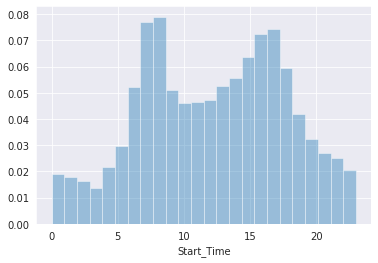

In [46]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

**Insights from this**
- most accidents happen between 6-9 AM(prolly people are in hurry to go to work, and also traffic would be higher) and then in evening around 2-6 PM
- After 6 PM, number of accidents keeps decreasing till next mornig

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


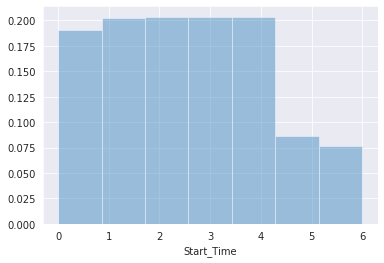

In [48]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

- on weekends, no. of accidents lower

Now, is the distribution of accident by hour same on weekend as that on weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


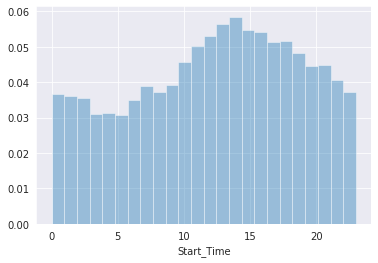

In [51]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

- on sunday, graph is evenly distributed. More accidents happen during evening and night time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


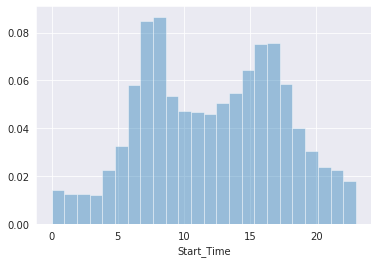

In [52]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

- on much difference in accident distribtion between sunday and monday.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


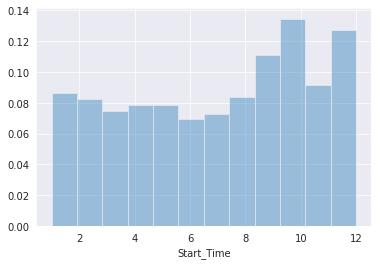

In [58]:
#month plot
df_2019 = df[df.Start_Time.dt.year==2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


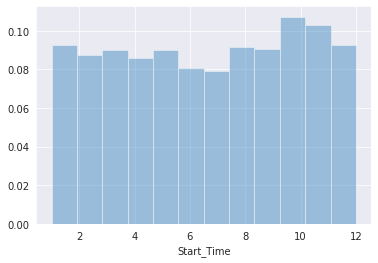

In [59]:
df_2018 = df[df.Start_Time.dt.year==2018]
sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

- Towards the end of the year, accidents increases.

Edit:
But when we look year by year, accidents are pretty much uniform in all months. Maybe theres not data for initial years

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


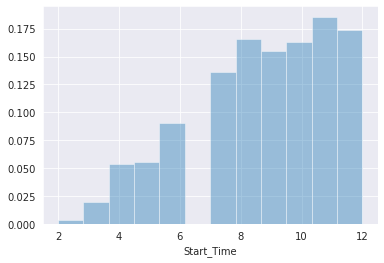

In [60]:
df_2016 = df[df.Start_Time.dt.year==2016]
sns.distplot(df_2016.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

- yeah, there's a data lag in 2016

### Start lat and long analysis

In [61]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [62]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

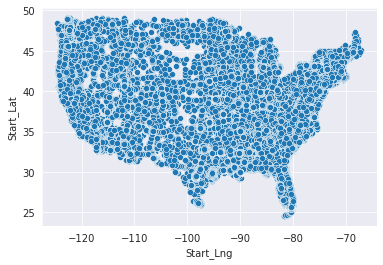

In [63]:
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat)

In [65]:
sample_df = df.sample(int(0.1*len(df)))

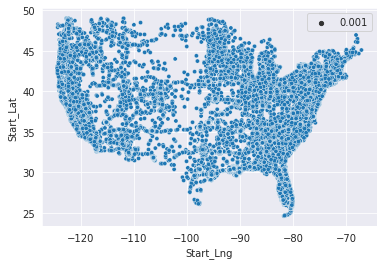

In [67]:
sns.scatterplot(x = sample_df.Start_Lng,y = sample_df.Start_Lat, size = 0.001)

Let try to plot these points on a map

In [77]:
#pip install folium
import folium
from folium.plugins import HeatMap

In [85]:
sample_df = df.sample(int(0.01*len(df)))

In [86]:
heat_data=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [87]:
lat,lng = df.Start_Lat[0],df.Start_Lng[0]
map = folium.Map()
HeatMap(heat_data).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder area
2. Which 5 states have the heighest number of accidents? How about per capita?
3. Does Newy York show up in the data ? If yes, why is accident count so low when it is the most populous city
4. Among the top 100 cities in number of accidents, which state they belong to
5. What time of the day are accidents more frequent in. - ANSWERED
6. Which days of the week have the most accidents.
7. Which months have the most accidents.
8. What is the trend of accidents over the year(decreasing or increasing)
9. When is the accidents per unit traffic the highest

-> New York is at 58th position in accident's list with accidents = 7327


# Summary and conclusion

Insights:
- Less than 4.5% cities have more than 1000 yearly accidents
- Number of accidents per city decreases exponentially(or increases)
- Over 5000 cities have reported just 10 or less accidents( Need to investigate)

# Areas and future work

- State-wise analysis of accidents
- 